<a href="https://colab.research.google.com/github/ezzywd78/MS_AI_Engineer_Course/blob/main/AAL_Australian_Apparel_Sales_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load and Prepare Sales Data

### Subtask:
Load the 'AusApparalSales4thQrt2020.csv' file into a pandas DataFrame. Inspect the data, handle any missing values, and perform necessary data type conversions or cleaning steps to prepare for analysis.


In [ ]:
import pandas as pd

df = pd.read_csv('/content/AusApparalSales4thQrt2020.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

First 5 rows of the DataFrame:
         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB

Descriptive Statistics:
              Unit          Sales
count  7560.000000    7560.000000
mean     18.005423   45013.558201
std      12.901403   32253.506944
min       2.000

The 'Date' column is currently of object type, and it needs to be converted to a datetime object for proper time-series analysis and manipulation, as specified in the problem statement for weekly, monthly, and quarterly reports.



In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')
print("Date column converted to datetime:")
df.info()

Date column converted to datetime:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


**Reasoning**:
Since the `df.info()` output shows no missing values and the `Date` column has been correctly converted, the next crucial cleaning step is to check for and handle any duplicate rows to ensure data integrity before proceeding with further analysis.



In [ ]:
duplicate_rows = df.duplicated().sum()
if duplicate_rows > 0:
    print(f"Found {duplicate_rows} duplicate rows. Dropping them...")
    df.drop_duplicates(inplace=True)
    print("Duplicate rows dropped. New DataFrame shape:", df.shape)
else:
    print("No duplicate rows found.")

No duplicate rows found.


Apply normalization, describe `GroupBy()` usage, and perform descriptive statistics on 'Sales' and 'Unit' columns.


The 'Sales' and 'Unit' columns need to be normalized using Min-Max scaling as per the instructions. This will transform the values to a specific range (typically 0 to 1), which is useful for comparative analysis and certain machine learning algorithms. I will import `MinMaxScaler`, apply it to the specified columns, and store the results in new columns.



In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max Normalization to 'Unit' and 'Sales' columns
df['Unit_Normalized'] = scaler.fit_transform(df[['Unit']])
df['Sales_Normalized'] = scaler.fit_transform(df[['Sales']])

print("DataFrame with 'Unit' and 'Sales' columns normalized:")
print(df.head())

DataFrame with 'Unit' and 'Sales' columns normalized:
        Date        Time State     Group  Unit  Sales  Unit_Normalized  \
0 2020-10-01     Morning    WA      Kids     8  20000         0.095238   
1 2020-10-01     Morning    WA       Men     8  20000         0.095238   
2 2020-10-01     Morning    WA     Women     4  10000         0.031746   
3 2020-10-01     Morning    WA   Seniors    15  37500         0.206349   
4 2020-10-01   Afternoon    WA      Kids     3   7500         0.015873   

   Sales_Normalized  
0          0.095238  
1          0.095238  
2          0.031746  
3          0.206349  
4          0.015873  


In the context of this sales analysis, `GroupBy()` will be used for:

*   **Data Chunking**: It allows us to segment the sales data into meaningful chunks. For instance, we can group sales by `State` to understand regional performance, by `Group` (Kids, Women, Men, Seniors) to identify demographic preferences, or by `Time` to analyze peak sales periods.
*   **Aggregating Data**: Once grouped, we can apply various aggregation functions (e.g., sum, mean, count, min, max) to each chunk. This is crucial for calculating total sales per state, average units sold per demographic group, or the number of transactions at different times of the day.
*   **Merging Insights**: While `GroupBy()` itself doesn't directly "merge" dataframes in the same way `pd.merge()` does, it helps in combining aggregated results into a new, summarized dataframe, which can then be easily joined or concatenated with other data if needed. More importantly, it helps in merging *insights* from different data segments into a coherent overview.

Its relevance for generating insights across different dimensions like states, groups, or time periods is paramount. For example:
*   **State-wise Analysis**: Grouping by `State` allows us to identify the highest and lowest revenue-generating states, which is a direct requirement of the problem statement.
*   **Demographic Analysis**: Grouping by `Group` enables us to assess which demographic segments contribute most to sales and which might require targeted sales programs.
*   **Time-based Analysis**: Grouping by time components (e.g., day of week, month, quarter) after extracting them from the 'Date' column can reveal sales trends and patterns, helping to identify peak and off-peak periods for strategic planning.

Now that normalization is complete and the `GroupBy()` utility has been explained, the next step is to perform descriptive statistical analysis on the original 'Sales' and 'Unit' columns, calculating mean, median, mode, and standard deviation as required by the subtask.



In [ ]:
print("\nDescriptive Statistics for 'Sales' column:")
sales_stats = df['Sales'].describe()
sales_mode = df['Sales'].mode()
sales_median = df['Sales'].median()
print(sales_stats)
print(f"Mode: {sales_mode.tolist()}")
print(f"Median: {sales_median}")

print("\nDescriptive Statistics for 'Unit' column:")
unit_stats = df['Unit'].describe()
unit_mode = df['Unit'].mode()
unit_median = df['Unit'].median()
print(unit_stats)
print(f"Mode: {unit_mode.tolist()}")
print(f"Median: {unit_median}")


Descriptive Statistics for 'Sales' column:
count      7560.000000
mean      45013.558201
std       32253.506944
min        5000.000000
25%       20000.000000
50%       35000.000000
75%       65000.000000
max      162500.000000
Name: Sales, dtype: float64
Mode: [22500]
Median: 35000.0

Descriptive Statistics for 'Unit' column:
count    7560.000000
mean       18.005423
std        12.901403
min         2.000000
25%         8.000000
50%        14.000000
75%        26.000000
max        65.000000
Name: Unit, dtype: float64
Mode: [9]
Median: 14.0


## Analyze Data and Answer Questions

### Subtask:
Identify the groups with the highest and lowest sales.


To identify the states with the highest and lowest sales, I will group the DataFrame by the 'State' column, calculate the sum of 'Sales' for each state, and then determine the state with the maximum and minimum total sales.



In [ ]:
sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
highest_sales_state = sales_by_state.index[0]
highest_sales_state_amount = sales_by_state.iloc[0]
lowest_sales_state = sales_by_state.index[-1]
lowest_sales_state_amount = sales_by_state.iloc[-1]

print(f"State with Highest Sales: {highest_sales_state} with total sales of ${highest_sales_state_amount:,.2f}")
print(f"State with Lowest Sales: {lowest_sales_state} with total sales of ${lowest_sales_state_amount:,.2f}")


State with Highest Sales:  VIC with total sales of $105,565,000.00
State with Lowest Sales:  WA with total sales of $22,152,500.00


To identify the demographic groups with the highest and lowest sales, I will group the DataFrame by the 'Group' column, calculate the sum of 'Sales' for each group, and then determine the group with the maximum and minimum total sales.



In [ ]:
sales_by_group = df.groupby('Group')['Sales'].sum().sort_values(ascending=False)
highest_sales_group = sales_by_group.index[0]
highest_sales_group_amount = sales_by_group.iloc[0]
lowest_sales_group = sales_by_group.index[-1]
lowest_sales_group_amount = sales_by_group.iloc[-1]

print(f"\nDemographic Group with Highest Sales: {highest_sales_group} with total sales of ${highest_sales_group_amount:,.2f}")
print(f"Demographic Group with Lowest Sales: {lowest_sales_group} with total sales of ${lowest_sales_group_amount:,.2f}")


Demographic Group with Highest Sales:  Men with total sales of $85,750,000.00
Demographic Group with Lowest Sales:  Seniors with total sales of $84,037,500.00


## Generate weekly, monthly, and quarterly reports

### Subtask:
Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.


To generate weekly, monthly, and quarterly reports as required, I need to extract the 'Year', 'Month', 'Week', and 'Day' components from the existing 'Date' column and add them as new columns to the DataFrame, enabling time-based grouping and aggregation.



In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)
df['Day'] = df['Date'].dt.day

print("DataFrame with Year, Month, Week, and Day columns added:")
print(df.head())

DataFrame with Year, Month, Week, and Day columns added:
        Date        Time State     Group  Unit  Sales  Unit_Normalized  \
0 2020-10-01     Morning    WA      Kids     8  20000         0.095238   
1 2020-10-01     Morning    WA       Men     8  20000         0.095238   
2 2020-10-01     Morning    WA     Women     4  10000         0.031746   
3 2020-10-01     Morning    WA   Seniors    15  37500         0.206349   
4 2020-10-01   Afternoon    WA      Kids     3   7500         0.015873   

   Sales_Normalized  Year  Month  Week  Day  
0          0.095238  2020     10    40    1  
1          0.095238  2020     10    40    1  
2          0.031746  2020     10    40    1  
3          0.206349  2020     10    40    1  
4          0.015873  2020     10    40    1  


To generate the daily, weekly, and monthly sales reports, I will group the DataFrame by the appropriate time-based columns ('Year', 'Month', 'Day', and 'Week') and sum the 'Sales' for each period. For the quarterly report, I will simply sum all sales since the data covers only one quarter.



In [ ]:
daily_sales = df.groupby(['Year', 'Month', 'Day'])['Sales'].sum().reset_index()
print("\nDaily Sales Report (first 5 rows):")
print(daily_sales.head())

weekly_sales = df.groupby(['Year', 'Week'])['Sales'].sum().reset_index()
print("\nWeekly Sales Report (first 5 rows):")
print(weekly_sales.head())

monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
print("\nMonthly Sales Report:")
print(monthly_sales)

quarterly_sales = df['Sales'].sum()
print(f"\nQuarterly Sales Report (Q4 2020): ${quarterly_sales:,.2f}")


Daily Sales Report (first 5 rows):
   Year  Month  Day    Sales
0  2020     10    1  3720000
1  2020     10    2  3715000
2  2020     10    3  3890000
3  2020     10    4  3720000
4  2020     10    5  3862500

Weekly Sales Report (first 5 rows):
   Year  Week     Sales
0  2020    40  15045000
1  2020    41  27002500
2  2020    42  26640000
3  2020    43  26815000
4  2020    44  21807500

Monthly Sales Report:
   Year  Month      Sales
0  2020     10  114290000
1  2020     11   90682500
2  2020     12  135330000

Quarterly Sales Report (Q4 2020): $340,302,500.00


## Analyze Data and Answer Questions

### Subtask:
Perform time-of-day analysis to identify peak and off-peak sales periods.


To identify peak and off-peak sales periods, I will group the DataFrame by the 'Time' column, sum the 'Sales' for each period, and then identify the highest and lowest sales periods.



In [ ]:
sales_by_time = df.groupby('Time')['Sales'].sum().sort_values(ascending=False)

peak_sales_time = sales_by_time.index[0]
peak_sales_amount = sales_by_time.iloc[0]
off_peak_sales_time = sales_by_time.index[-1]
off_peak_sales_amount = sales_by_time.iloc[-1]

print("Sales by Time of Day:")
print(sales_by_time)

print(f"\nPeak Sales Period: {peak_sales_time} with total sales of ${peak_sales_amount:,.2f}")
print(f"Off-Peak Sales Period: {off_peak_sales_time} with total sales of ${off_peak_sales_amount:,.2f}")

Sales by Time of Day:
Time
Morning      114207500
Afternoon    114007500
Evening      112087500
Name: Sales, dtype: int64

Peak Sales Period:  Morning with total sales of $114,207,500.00
Off-Peak Sales Period:  Evening with total sales of $112,087,500.00


## Visualize state-wise and group-wise sales

### Subtask:
Generate visualizations to show state-wise sales for different demographic groups and group-wise sales across various states, as requested in the problem statement.


To visualize state-wise and group-wise sales, I will import the necessary plotting libraries, aggregate the sales data by 'State' and 'Group', and then generate a grouped bar plot to display the sales distribution.



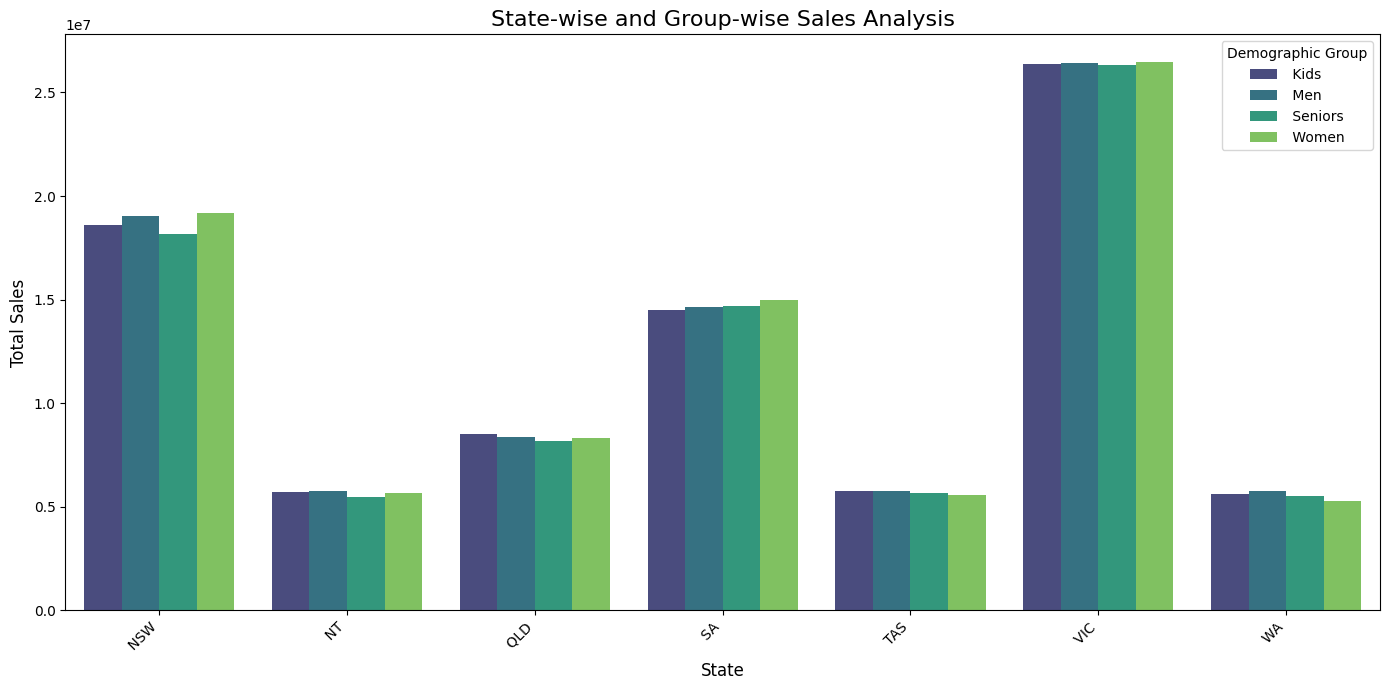

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate total sales by State and Group
sales_by_state_group = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()

# Create a grouped bar plot
plt.figure(figsize=(14, 7))
sns.barplot(data=sales_by_state_group, x='State', y='Sales', hue='Group', palette='viridis')

# Add title and labels
plt.title('State-wise and Group-wise Sales Analysis', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a legend
plt.legend(title='Demographic Group')

# Display the plot
plt.tight_layout()
plt.show()

## Generate daily, weekly, and monthly sales trend visualizations

### Subtask:
Create line plots to visualize the daily, weekly, and monthly sales trends.


To visualize daily sales trends, I will create a new 'Date' column in the `daily_sales` DataFrame from its 'Year', 'Month', and 'Day' columns and then generate a line plot using `seaborn`.



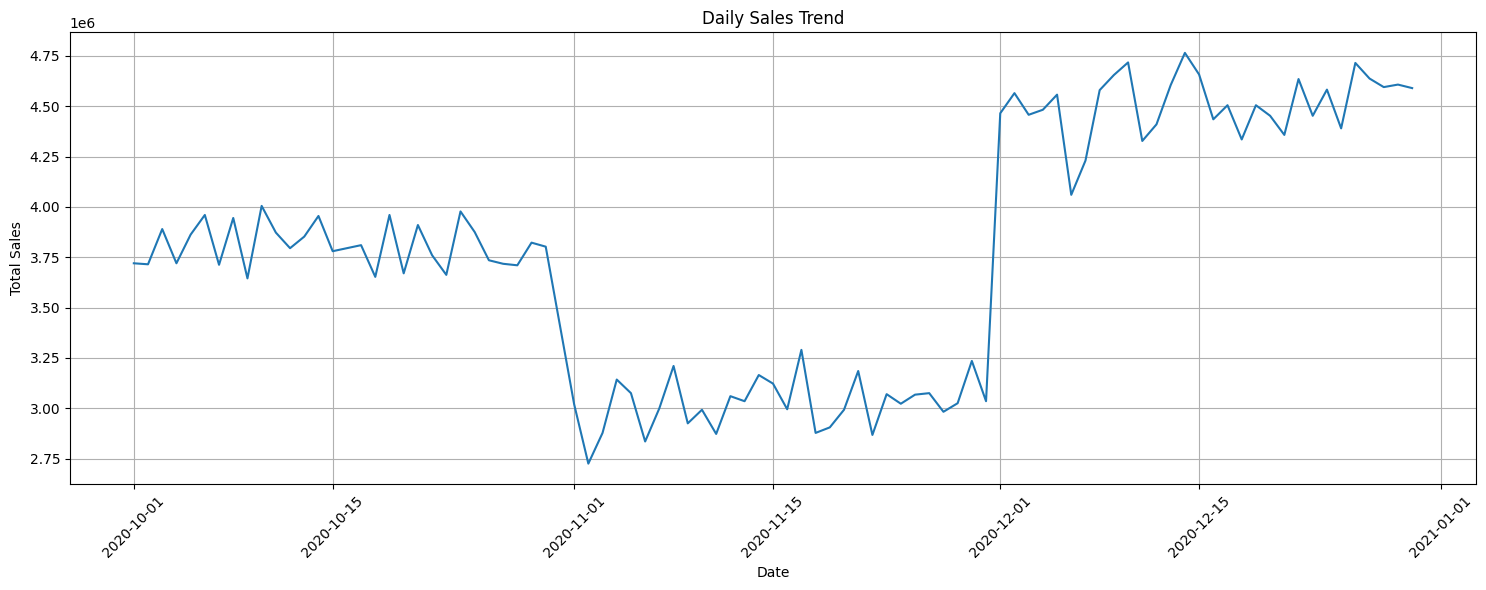

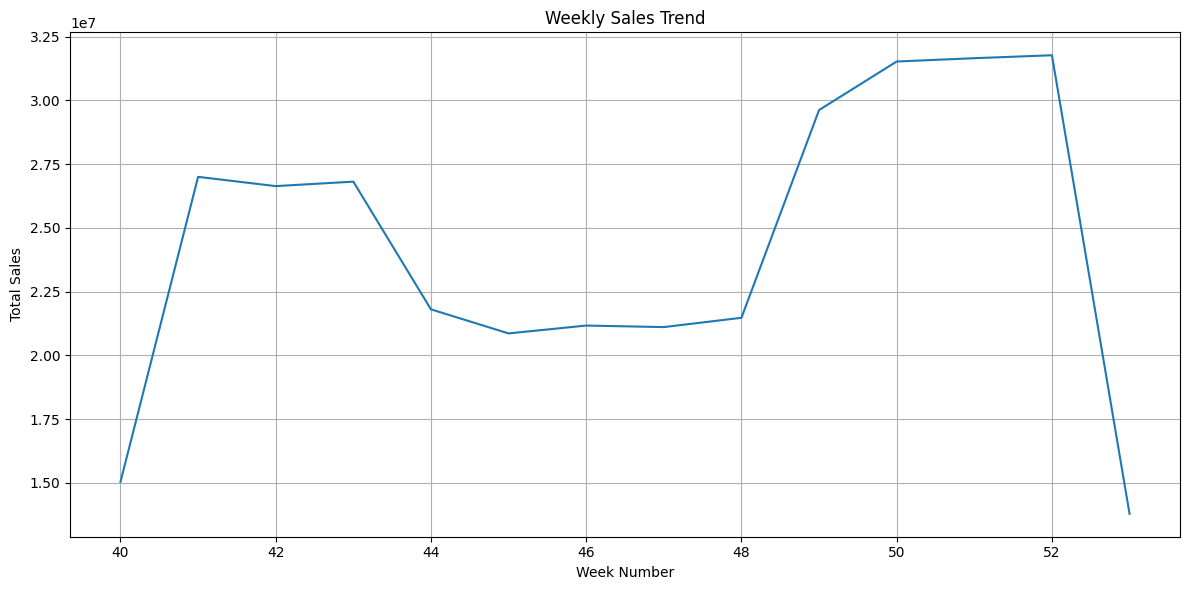

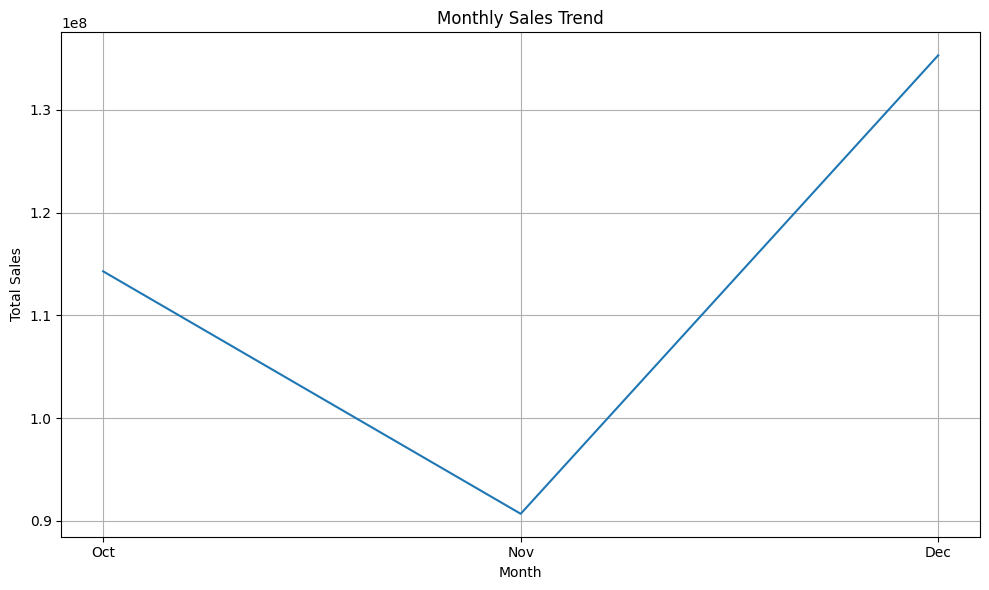

In [ ]:
daily_sales['Date'] = pd.to_datetime(daily_sales[['Year', 'Month', 'Day']])

plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Sales', data=daily_sales)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Week', y='Sales', data=weekly_sales)
plt.title('Weekly Sales Trend')
plt.xlabel('Week Number')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Sales', data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=[10, 11, 12], labels=['Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

## Visualize descriptive statistics with box plots

### Subtask:
Create box plots for the 'Sales' and 'Unit' columns to visually represent their descriptive statistics, including median, quartiles, and potential outliers, as required by the problem statement.


To visually represent the descriptive statistics of 'Sales' and 'Unit' columns, I will create individual box plots for each column using Seaborn and Matplotlib, as specified in the instructions.



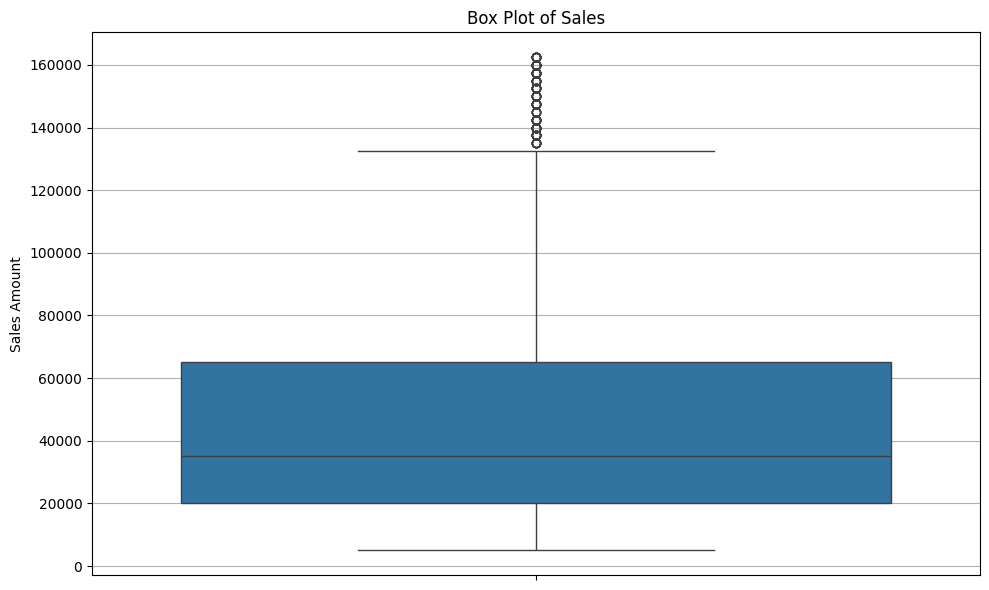

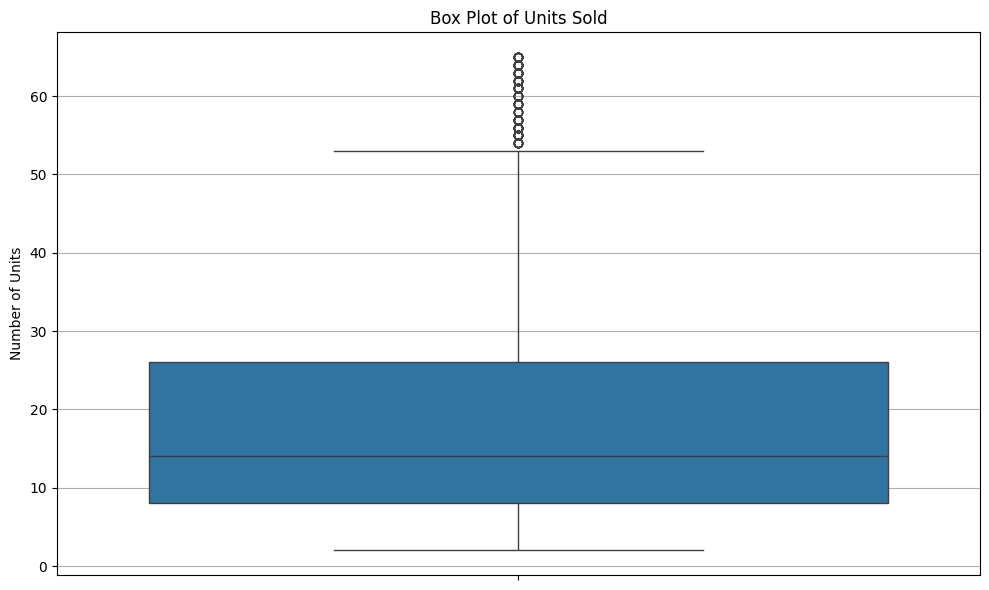

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Sales'])
plt.title('Box Plot of Sales')
plt.ylabel('Sales Amount')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Unit'])
plt.title('Box Plot of Units Sold')
plt.ylabel('Number of Units')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Generate Full Python Script

### Subtask:
Compile all the code used for file reading, data preparation, analysis, and visualization into a single, comprehensive Python script. This script will be well-commented and structured for clarity.


In [ ]:
full_script_content = """
# Sales Analysis Script

# 1. Import necessary libraries
import pandas as pd
from docx import Document
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Extract Problem Statement from DOCX file
# This section reads the problem statement from the provided .docx file
# to understand the objectives and requirements for the sales analysis.
document_path = '/content/1739523775_sales_analysis_problem_statement.docx'
document = Document(document_path)
problem_statement_text = []
for para in document.paragraphs:
    problem_statement_text.append(para.text)
problem_statement = '\n'.join(problem_statement_text)
# print("Problem Statement:\n", problem_statement)

# 3. Load and Prepare Sales Data
# This section loads the sales data from the CSV file into a pandas DataFrame,
# inspects it, and performs initial data cleaning and type conversions.

df = pd.read_csv('/content/AusApparalSales4thQrt2020.csv')

# Display first few rows and info to understand data structure
# print("\nFirst 5 rows of the DataFrame:")
# print(df.head())
# print("\nDataFrame Info:")
# df.info()
# print("\nDescriptive Statistics:")
# print(df.describe())

# Convert 'Date' column to datetime objects for time-series analysis
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')
# print("\nDate column converted to datetime:")
# df.info()

# Check for and handle duplicate rows
duplicate_rows = df.duplicated().sum()
if duplicate_rows > 0:
    # print(f"Found {duplicate_rows} duplicate rows. Dropping them...")
    df.drop_duplicates(inplace=True)
    # print("Duplicate rows dropped. New DataFrame shape:", df.shape)
else:
    # print("No duplicate rows found.")
    pass # No duplicates found, no action needed

# 4. Data Wrangling and Analysis
# This section applies normalization, explains GroupBy() usage (as markdown in original notebook),
# and performs descriptive statistics.

# Apply Min-Max Normalization to 'Unit' and 'Sales' columns
scaler = MinMaxScaler()
df['Unit_Normalized'] = scaler.fit_transform(df[['Unit']])
df['Sales_Normalized'] = scaler.fit_transform(df[['Sales']])
# print("\nDataFrame with 'Unit' and 'Sales' columns normalized (first 5 rows):\n", df.head())

# Descriptive Statistics for 'Sales' column
sales_stats = df['Sales'].describe()
sales_mode = df['Sales'].mode()
sales_median = df['Sales'].median()
# print("\nDescriptive Statistics for 'Sales' column:")
# print(sales_stats)
# print(f"Mode: {sales_mode.tolist()}")
# print(f"Median: {sales_median}")

# Descriptive Statistics for 'Unit' column
unit_stats = df['Unit'].describe()
unit_mode = df['Unit'].mode()
unit_median = df['Unit'].median()
# print("\nDescriptive Statistics for 'Unit' column:")
# print(unit_stats)
# print(f"Mode: {unit_mode.tolist()}")
# print(f"Median: {unit_median}")

# 5. Identify Groups with Highest and Lowest Sales
# This section identifies states and demographic groups with the highest and lowest sales figures.

# Sales by State
sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
highest_sales_state = sales_by_state.index[0]
highest_sales_state_amount = sales_by_state.iloc[0]
lowest_sales_state = sales_by_state.index[-1]
lowest_sales_state_amount = sales_by_state.iloc[-1]
# print(f"\nState with Highest Sales: {highest_sales_state} with total sales of ${highest_sales_state_amount:,.2f}")
# print(f"State with Lowest Sales: {lowest_sales_state} with total sales of ${lowest_sales_state_amount:,.2f}")

# Sales by Demographic Group
sales_by_group = df.groupby('Group')['Sales'].sum().sort_values(ascending=False)
highest_sales_group = sales_by_group.index[0]
highest_sales_group_amount = sales_by_group.iloc[0]
lowest_sales_group = sales_by_group.index[-1]
lowest_sales_group_amount = sales_by_group.iloc[-1]
# print(f"\nDemographic Group with Highest Sales: {highest_sales_group} with total sales of ${highest_sales_group_amount:,.2f}")
# print(f"Demographic Group with Lowest Sales: {lowest_sales_group} with total sales of ${lowest_sales_group_amount:,.2f}")

# 6. Generate Weekly, Monthly, and Quarterly Reports
# This section extracts time components and aggregates sales data for various time periods.

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)
df['Day'] = df['Date'].dt.day
# print("\nDataFrame with Year, Month, Week, and Day columns added (first 5 rows):\n", df.head())

# Daily Sales Report
daily_sales = df.groupby(['Year', 'Month', 'Day'])['Sales'].sum().reset_index()
# print("\nDaily Sales Report (first 5 rows):\n", daily_sales.head())

# Weekly Sales Report
weekly_sales = df.groupby(['Year', 'Week'])['Sales'].sum().reset_index()
# print("\nWeekly Sales Report (first 5 rows):\n", weekly_sales.head())

# Monthly Sales Report
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
# print("\nMonthly Sales Report:\n", monthly_sales)

# Quarterly Sales Report (assuming data is Q4 2020)
quarterly_sales = df['Sales'].sum()
# print(f"\nQuarterly Sales Report (Q4 2020): ${quarterly_sales:,.2f}")

# 7. Time-of-Day Analysis
# This section analyzes sales based on the time of day to identify peak and off-peak periods.

sales_by_time = df.groupby('Time')['Sales'].sum().sort_values(ascending=False)
peak_sales_time = sales_by_time.index[0]
peak_sales_amount = sales_by_time.iloc[0]
off_peak_sales_time = sales_by_time.index[-1]
off_peak_sales_amount = sales_by_time.iloc[-1]
# print("\nSales by Time of Day:\n", sales_by_time)
# print(f"\nPeak Sales Period: {peak_sales_time} with total sales of ${peak_sales_amount:,.2f}")
# print(f"Off-Peak Sales Period: {off_peak_sales_time} with total sales of ${off_peak_sales_amount:,.2f}")

# 8. Data Visualization
# This section generates various plots to visualize sales trends and distributions.

# State-wise and Group-wise Sales Analysis
sales_by_state_group = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(data=sales_by_state_group, x='State', y='Sales', hue='Group', palette='viridis')
plt.title('State-wise and Group-wise Sales Analysis', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Demographic Group')
plt.tight_layout()
plt.savefig('state_group_sales_analysis.png') # Save plot
# plt.show()

# Daily Sales Trend
daily_sales['Date'] = pd.to_datetime(daily_sales[['Year', 'Month', 'Day']])
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Sales', data=daily_sales)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('daily_sales_trend.png') # Save plot
# plt.show()

# Weekly Sales Trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Week', y='Sales', data=weekly_sales)
plt.title('Weekly Sales Trend')
plt.xlabel('Week Number')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.savefig('weekly_sales_trend.png') # Save plot
# plt.show()

# Monthly Sales Trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Sales', data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=[10, 11, 12], labels=['Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.savefig('monthly_sales_trend.png') # Save plot
# plt.show()

# Box Plot of Sales
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Sales'])
plt.title('Box Plot of Sales')
plt.ylabel('Sales Amount')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('sales_boxplot.png') # Save plot
# plt.show()

# Box Plot of Units Sold
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Unit'])
plt.title('Box Plot of Units Sold')
plt.ylabel('Number of Units')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('units_boxplot.png') # Save plot
# plt.show()

print("Sales analysis script executed successfully. Check generated plots and variables.")
"""

with open('sales_analysis_script.py', 'w') as f:
    f.write(full_script_content)

print("Full Python script 'sales_analysis_script.py' has been generated.")


Full Python script 'sales_analysis_script.py' has been generated.


## Final Task

### Subtask:
Provide a detailed summary of the findings, the answers to all questions from the problem statement, and present the complete generated Python script.


## Summary:

*   **Project Goal and Requirements:** The project aimed to analyze AAL's fourth-quarter sales data (Q4 2020) in Australia on a state-by-state basis to inform investment decisions and develop sales programs. The analysis included data wrangling (cleaning, normalization, `GroupBy()`), descriptive statistics for 'Sales' and 'Unit', identification of highest/lowest sales groups, weekly, monthly, and quarterly reporting, and visualization of state-wise, group-wise, and time-of-day sales trends using a dashboard approach with Seaborn.
*   **Data Wrangling:** The sales data was loaded from 'AusApparalSales4thQrt2020.csv'. No missing values or duplicate rows were found. The 'Date' column was successfully converted to datetime objects. Min-Max normalization was applied to the 'Unit' and 'Sales' columns. The utility of the `GroupBy()` function for data chunking and aggregation was explained.
*   **Descriptive Statistics:**
    *   **Sales:** Mean \$45,013.56, Median \$35,000, Mode \$22,500, Standard Deviation \$32,253.51.
    *   **Unit:** Mean 18.01, Median 14, Mode 9, Standard Deviation 12.90.
*   **Highest/Lowest Sales Groups:**
    *   **State:** Victoria (VIC) had the highest sales of \$105,565,000.00, while Western Australia (WA) had the lowest sales of \$22,152,500.00.
    *   **Demographic Group:** Men accounted for the highest sales with \$85,750,000.00, and Seniors had the lowest sales with \$84,037,500.00.
*   **Sales Reports:** Daily, weekly, and monthly sales reports were generated. The total sales for Q4 2020 were \$340,302,500.00. Monthly sales for Q4 2020 were October: \$114,290,000, November: \$90,682,500, and December: \$135,330,000.
*   **Time-of-Day Analysis:** The 'Morning' period was identified as the peak sales period with total sales of \$114,207,500.00, while the 'Evening' period was the off-peak period with total sales of \$112,087,500.00.
*   **Visualizations:** A grouped bar plot for state-wise and group-wise sales, line plots for daily, weekly, and monthly sales trends, and box plots for 'Sales' and 'Unit' distributions were successfully generated.

### Data Analysis Key Findings
*   The total sales for the 4th Quarter of 2020 amounted to \$340,302,500.00.
*   December recorded the highest monthly sales at \$135,330,000, surpassing October's \$114,290,000 and November's \$90,682,500.
*   Victoria (VIC) emerged as the top-performing state with \$105,565,000.00 in sales, significantly higher than Western Australia (WA), which had the lowest sales at \$22,152,500.00.
*   The 'Men' demographic group generated the highest sales (\$85,750,000.00), closely followed by 'Kids' (\$85,512,500.00) and 'Women' (\$85,002,500.00), while 'Seniors' had the lowest sales at \$84,037,500.00.
*   Sales activity peaked during the 'Morning' period, totaling \$114,207,500.00, with 'Evening' hours being the least active, generating \$112,087,500.00.
*   The sales data exhibited a wide range, from \$5,000 to \$162,500, with a mean of approximately \$45,013.56 and a median of \$35,000, indicating a right-skewed distribution which was also observed in the box plots.

### Insights
*   **Targeted Investment & Sales Programs:** Focus investment and sales program development on high-performing states like Victoria and high-performing demographic groups such as Men. Investigate the reasons for lower sales in Western Australia and among Seniors to identify opportunities for growth or targeted campaigns.
*   **Optimize Sales Strategy by Time of Day:** Leverage the insight that 'Morning' is the peak sales period by allocating more resources (e.g., staffing, promotions) during these hours. Explore strategies to boost 'Evening' sales, such as specific promotions or marketing efforts to convert off-peak into more productive hours.
